# Performing K-Means clustering on Athletes dataset

- K-Means is a method of determining which group a given object belongs to.
- It works by calculating the distance of a given point to the centroids and assigning it to a cluster based on which centroid it is closest to.

- The k-means algorithm:
    - a) Define the # of clusters (k)
    - b) Randomly select k cluster centres
    - c) Calculate the distance from each point to the centres
    - d) Assign data points to nearest cluster
    - e) Take average of all points in a cluster to find a new cluster centre
    - f) Repeat c-e until the centroids don't change or reach a stop criterion



# Assumptions of K-Means

- The number of clusters (k) is correct
- Data distribution is isotropic (circular distribution)
- Variance is the same for each variable
- Clusters have similar number of objects

# Pros of K-Means

- Fast, robust and easy to understand
- Gives good results for data which has distinct categories or categories are well separated from each other

# Cons of K-Means

- Requires number of cluster centres to be set (k). May not know how many to set.
- Exclusive assignment of points - doesn't split overlapping data
- Affected by non-linear transformations - a different transformation will give different results

# Features of the dataset
Data was collected on various aspects of blood in order to determine the effects of sport, body size and sex of athletes on blood composition.

rcc = red blood cell count, in

wcc = white blood cell count, in per liter

hc = hematocrit, percent

hg = hemaglobin concentration, in g per decaliter

ferr = plasma ferritins, ng

bmi = Body mass index, kg

ssf = sum of skin folds

pcBfat = percent Body fat

lbm = lean body mass, kg

ht = height, cm

wt = weight, kg

sex = a factor with levels f m

sport = a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

dataset download:
- vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv


In [ ]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [2]:
csv_file = 'data/ais.csv'

athlete = pd.read_csv(csv_file)

In [3]:
athlete.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


1) EDA

In [4]:
# 202 records in 14 columns
athlete.shape

(202, 14)

In [5]:
# data types seem correct based on data in the columns above
athlete.dtypes

Unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcBfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

In [6]:
# there are no null values

athlete.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [7]:
## Check data

# About Athlete dataset
print('Athlete dataset is a %s' % type(athlete))
print('Athlete dataset has %d rows and %d columns' % athlete.shape)
print('Basic Statistics about Athlete dataset%s' % ('_'*50))
print(athlete.describe())
print('')
print('Sample of Athlete dataset%s' % ('_'*50))
print(athlete.head())

Athlete dataset is a <class 'pandas.core.frame.DataFrame'>
Athlete dataset has 202 rows and 14 columns
Basic Statistics about Athlete dataset__________________________________________________
       Unnamed: 0         rcc         wcc          hc          hg        ferr  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   101.500000    4.718614    7.108911   43.091584   14.566337   76.876238   
std     58.456537    0.457976    1.800337    3.662989    1.362451   47.501239   
min      1.000000    3.800000    3.300000   35.900000   11.600000    8.000000   
25%     51.250000    4.372500    5.900000   40.600000   13.500000   41.250000   
50%    101.500000    4.755000    6.850000   43.500000   14.700000   65.500000   
75%    151.750000    5.030000    8.275000   45.575000   15.575000   97.000000   
max    202.000000    6.720000   14.300000   59.700000   19.200000  234.000000   

              bmi         ssf      pcBfat         lbm          ht          wt 

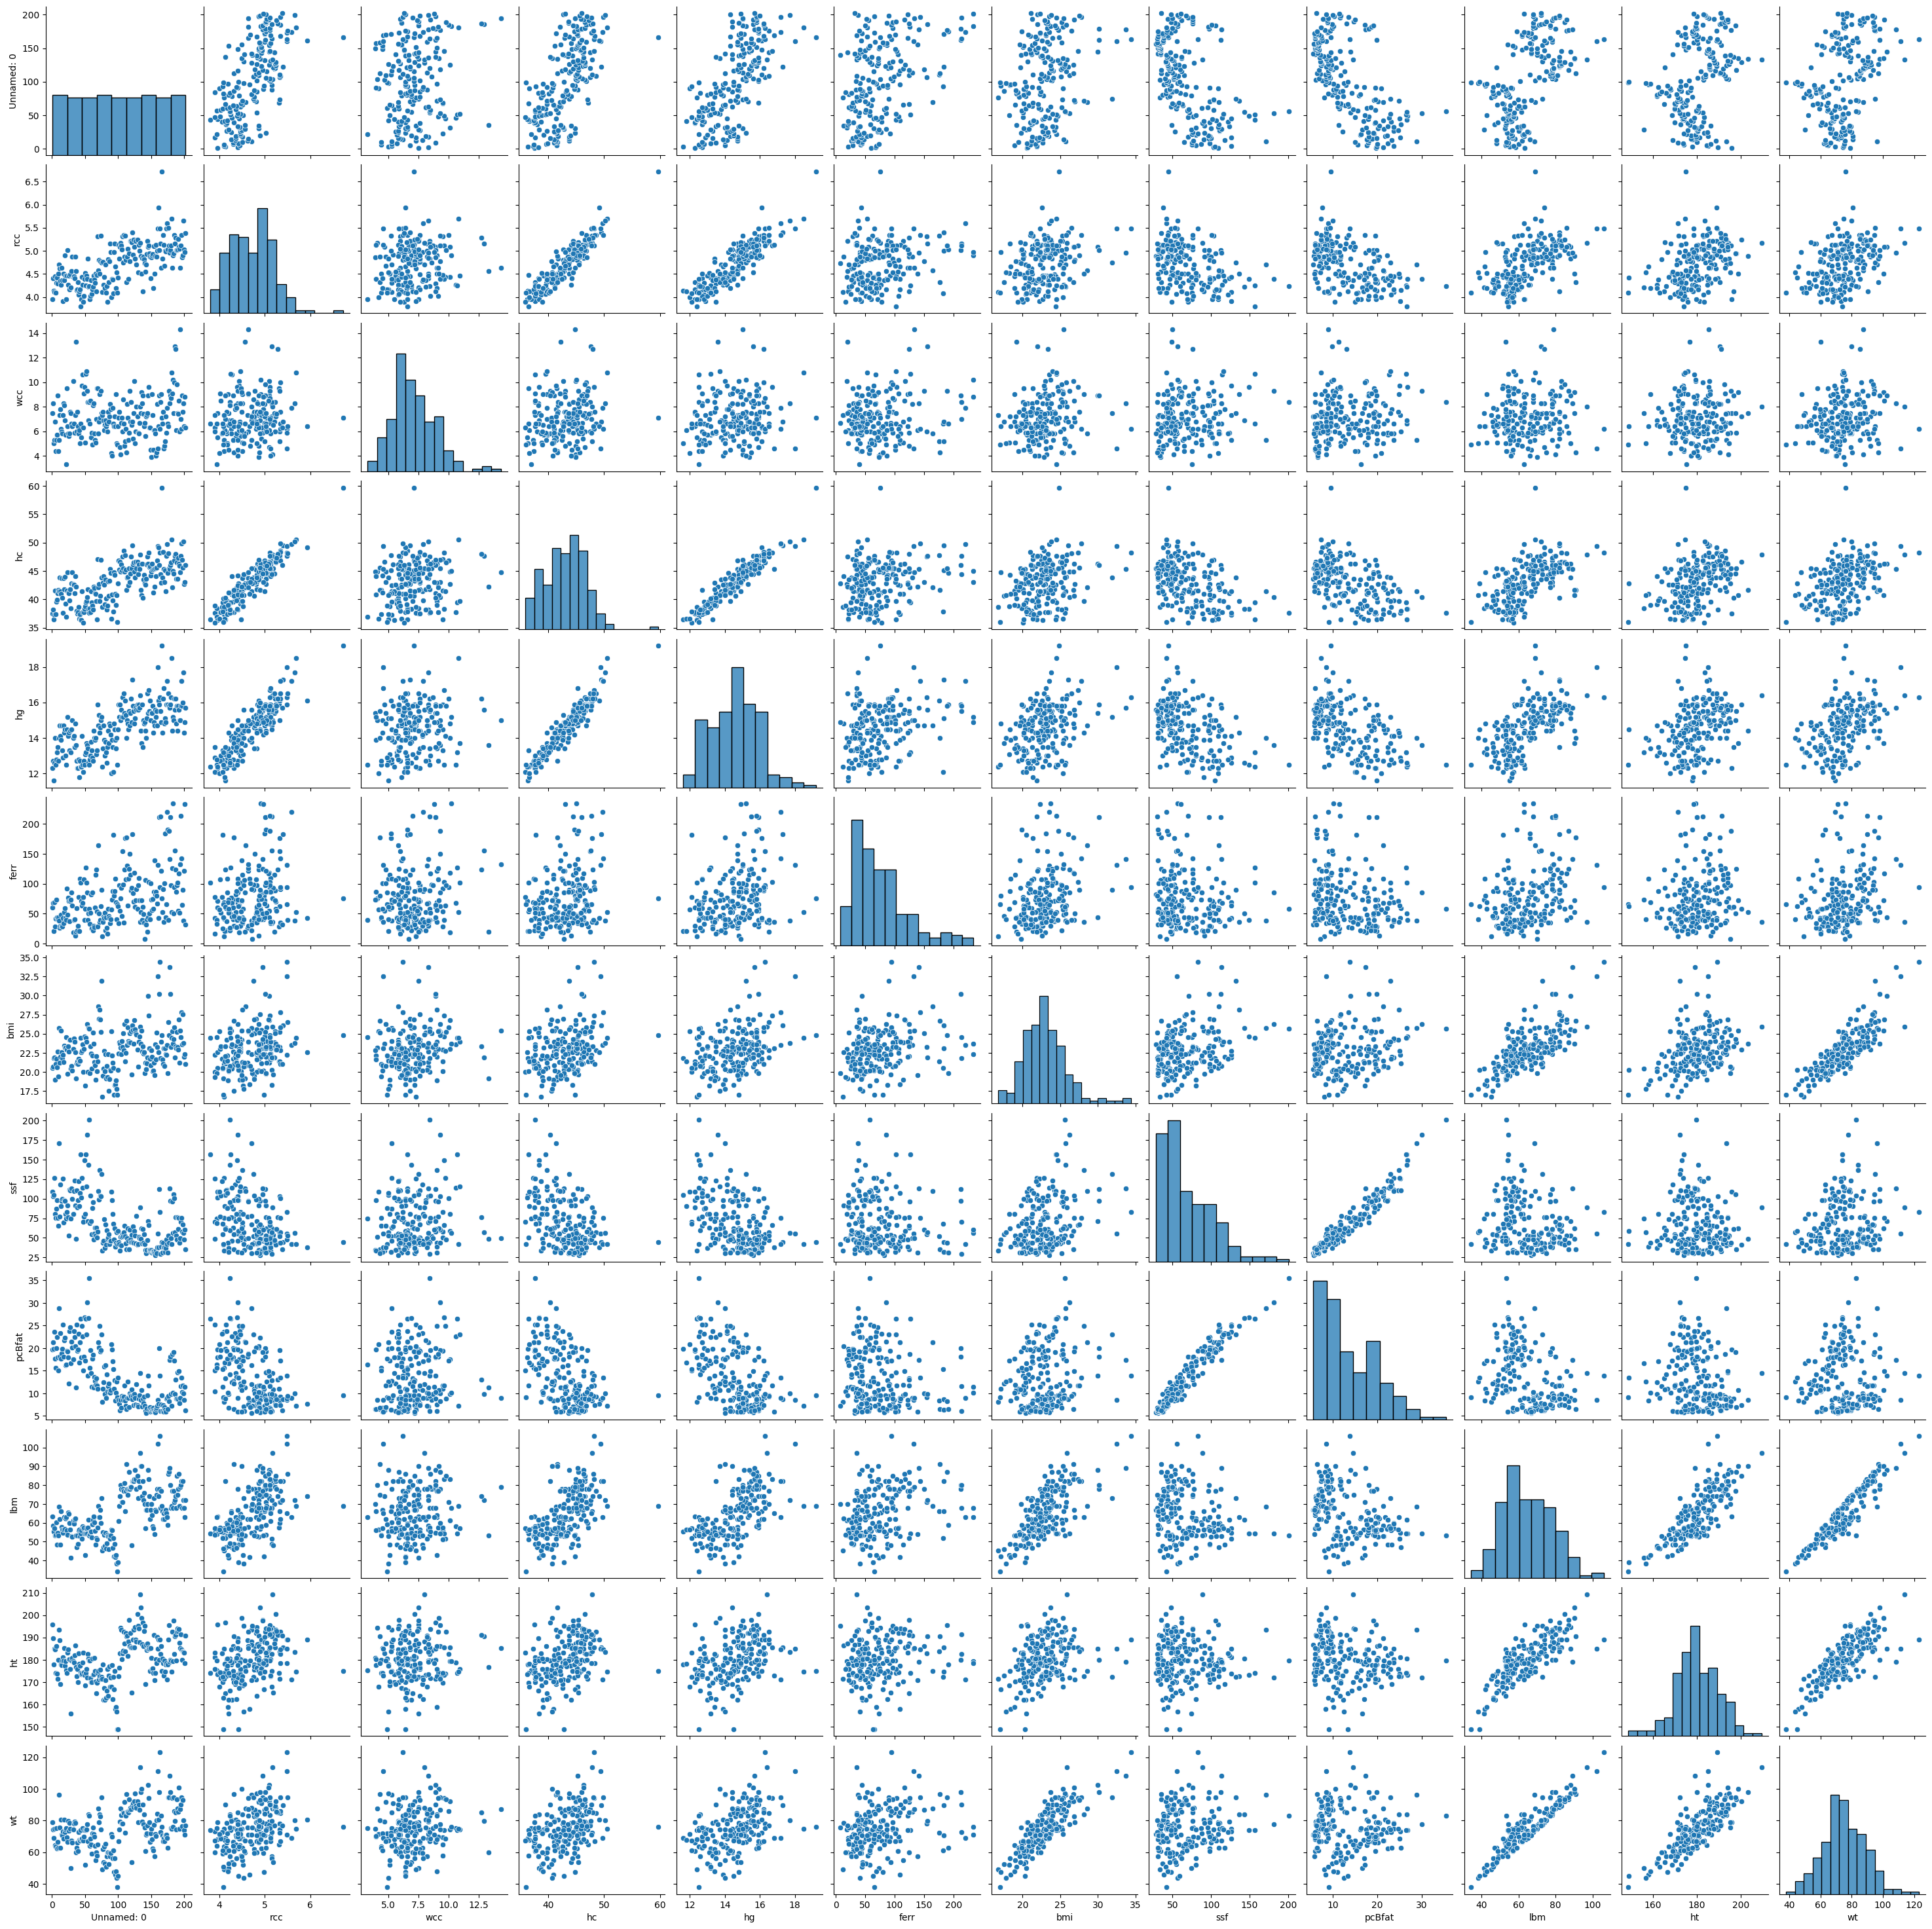

In [8]:
# Visualise the data points
# visualise features in pairs
sns.pairplot(athlete)
plt.show()

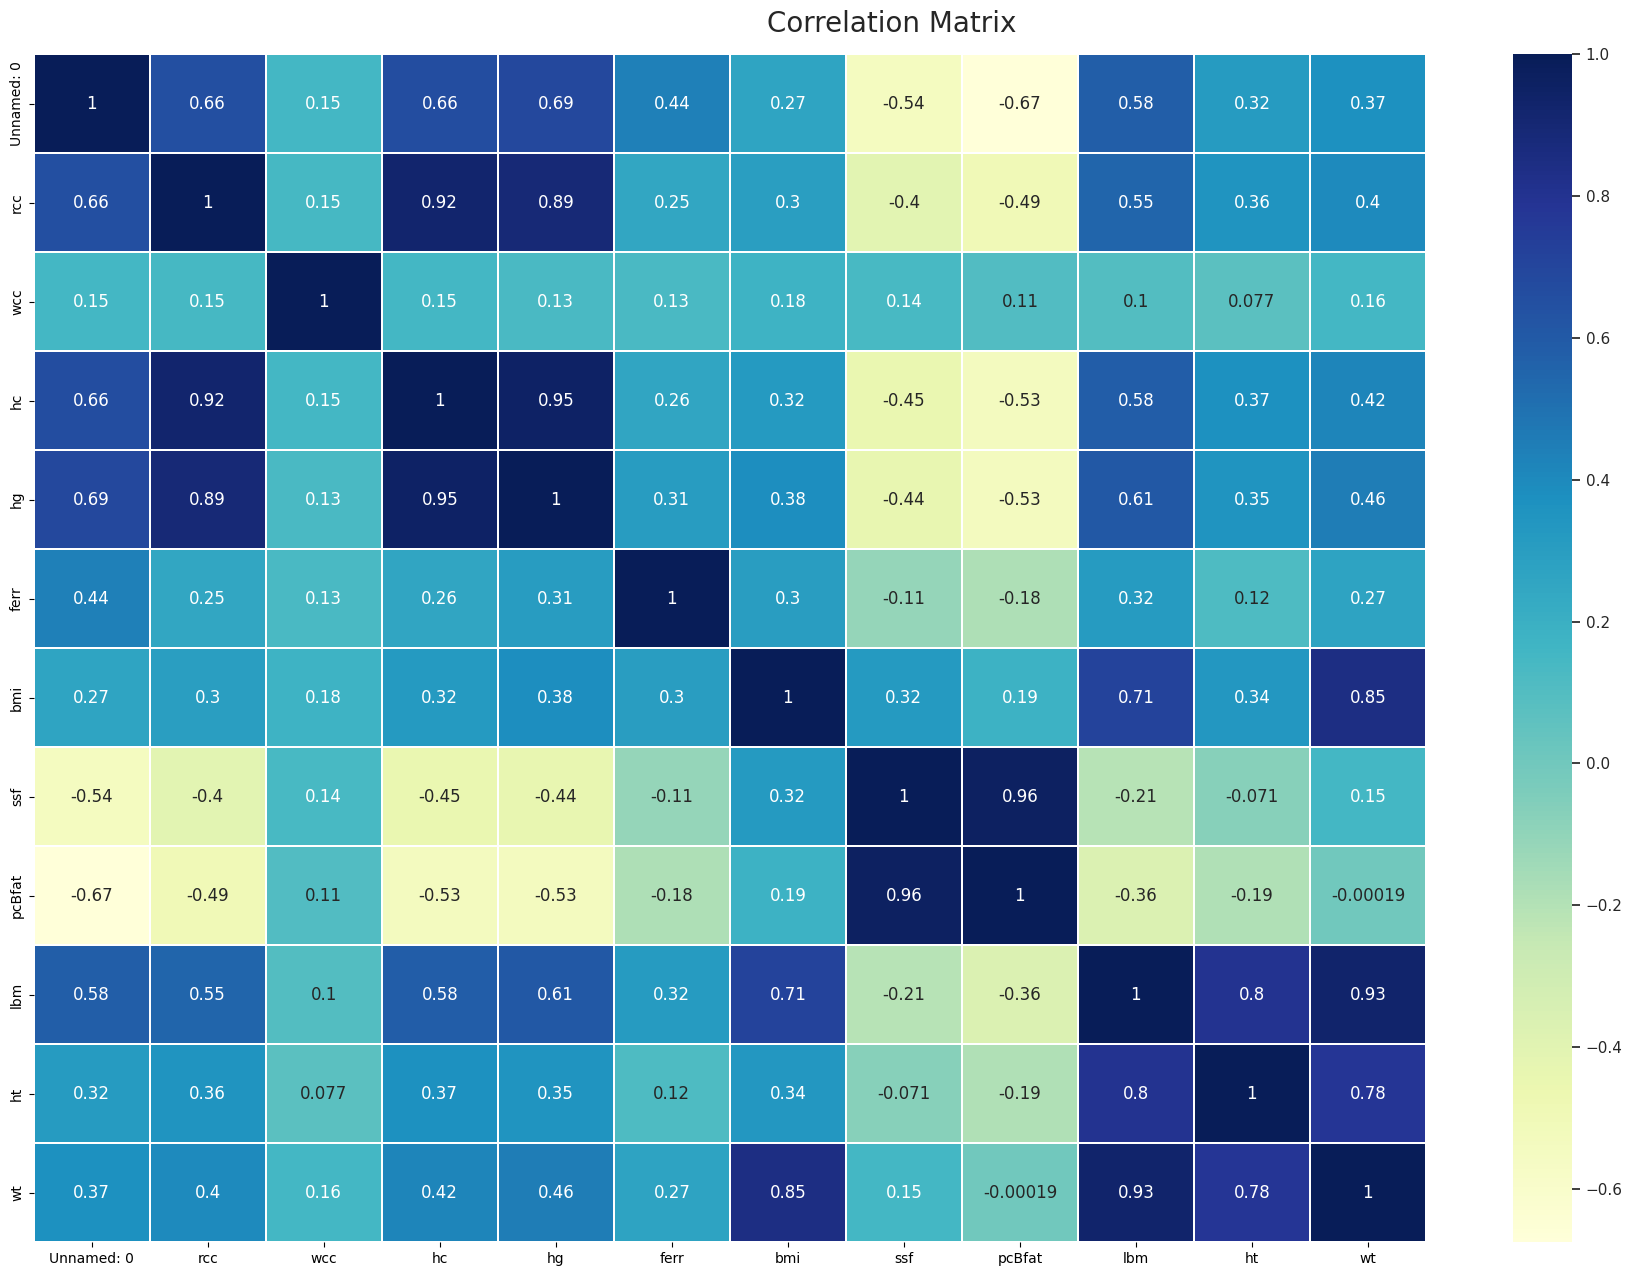

In [9]:
# heatmap of the correlations between variables
plt.subplots(figsize = (18,13))
sns.set(font_scale = 1)

hmap = sns.heatmap(data = athlete.corr(numeric_only = True),
            annot = True,
            linewidths = .5,
            cmap = "YlGnBu"
            )

plt.suptitle("Correlation Matrix", fontsize = 20)
plt.tight_layout()

In [10]:
athlete['sport'].unique()

array(['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt',
       'Tennis', 'Gym', 'W_Polo'], dtype=object)

In [11]:
athlete['sport'].value_counts()

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

In [12]:
athlete['sex'].unique()

array(['f', 'm'], dtype=object)

In [13]:
athlete['sex'].value_counts()

m    102
f    100
Name: sex, dtype: int64

2) Prepare data for clustering

In [14]:
# remove target features and label column
athlete_cluster_dat = athlete.drop(['Unnamed: 0', 'sex', 'sport'], inplace = False, axis = 1)

In [15]:
athlete_cluster_dat.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [16]:
# Put the features on the same scale = normalise the data

athlete_cluster_norm = normalize(athlete_cluster_dat)

In [17]:
nmes = list(athlete_cluster_dat.columns)
athlete_cluster_norm = pd.DataFrame(athlete_cluster_norm, columns = nmes)

athlete_cluster_norm.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,0.015350,0.029071,0.145357,0.047677,0.232571,0.079694,0.422892,0.076555,0.245440,0.759345,0.305831
1,0.017607,0.033139,0.152518,0.050706,0.271498,0.082527,0.410442,0.085043,0.233768,0.757400,0.297051
2,0.017948,0.021676,0.157800,0.050288,0.091039,0.094767,0.453459,0.086183,0.239995,0.770794,0.299560
3,0.015941,0.020556,0.144669,0.048869,0.267619,0.084862,0.490246,0.091766,0.221774,0.717528,0.290502
4,0.019700,0.030104,0.183721,0.061978,0.128383,0.083936,0.355489,0.078092,0.235517,0.817226,0.285985


3) Perform clustering with KMeans

In [18]:
# https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

X = athlete_cluster_norm

X.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,0.015350,0.029071,0.145357,0.047677,0.232571,0.079694,0.422892,0.076555,0.245440,0.759345,0.305831
1,0.017607,0.033139,0.152518,0.050706,0.271498,0.082527,0.410442,0.085043,0.233768,0.757400,0.297051
2,0.017948,0.021676,0.157800,0.050288,0.091039,0.094767,0.453459,0.086183,0.239995,0.770794,0.299560
3,0.015941,0.020556,0.144669,0.048869,0.267619,0.084862,0.490246,0.091766,0.221774,0.717528,0.290502
4,0.019700,0.030104,0.183721,0.061978,0.128383,0.083936,0.355489,0.078092,0.235517,0.817226,0.285985


In [19]:
# target variable = sex, female = 1, male = 0
y = athlete['sex']
y = y.map(dict(f=1, m=0))
y

0      1
1      1
2      1
3      1
4      1
      ..
197    0
198    0
199    0
200    0
201    0
Name: sex, Length: 202, dtype: int64

In [20]:
names = list(X.columns)

names

['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']

In [21]:
# make sure data points aren't listed in any particular order
X, y = shuffle(X, y, random_state=42)

In [22]:
# run model with 2 classes
model = KMeans(n_clusters = 2, random_state = 0)
kmeans = model.fit(X)

In [23]:
# run model with 4 classes
model1 = KMeans(n_clusters = 4, random_state = 0)
kmeans4 = model1.fit(X)

In [24]:
kmeans.labels_

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0], dtype=int32)

In [25]:
kmeans4.labels_

array([3, 0, 0, 1, 1, 1, 3, 2, 3, 0, 3, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 0,
       0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 3, 0, 2, 1, 3, 1, 2, 2, 2, 0, 2, 1,
       0, 1, 0, 2, 0, 2, 3, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 2, 3, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 3, 2,
       1, 0, 1, 3, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 3,
       1, 1, 1, 0, 2, 0, 2, 2, 2, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 0, 0,
       2, 0, 2, 3, 1, 2, 0, 1, 2, 2, 3, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0,
       2, 3, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 3, 2, 2, 1, 0, 3,
       0, 3, 1, 2], dtype=int32)

In [26]:
centroids = kmeans.cluster_centers_

centroids

array([[0.02000369, 0.03024778, 0.18302125, 0.06157756, 0.21333886,
        0.09742766, 0.32080693, 0.06402455, 0.26779632, 0.77508463,
        0.31441293],
       [0.01904534, 0.02823574, 0.17352675, 0.05907797, 0.47519254,
        0.09072005, 0.21466172, 0.04102131, 0.26613997, 0.70398127,
        0.297704  ]])

In [27]:
centroids4 = kmeans4.cluster_centers_

centroids4

array([[0.01798306, 0.02873869, 0.16387568, 0.0551026 , 0.23530226,
        0.09505887, 0.45665591, 0.08895682, 0.23398208, 0.72587705,
        0.29958841],
       [0.01993306, 0.02840508, 0.18229117, 0.06202592, 0.39497111,
        0.09564479, 0.22177659, 0.04275378, 0.28378054, 0.74263358,
        0.31684873],
       [0.02139918, 0.03209038, 0.19594609, 0.06585301, 0.18679196,
        0.098393  , 0.23671258, 0.04879209, 0.28629637, 0.80999694,
        0.32075796],
       [0.01715113, 0.02605745, 0.15577006, 0.05313671, 0.62476764,
        0.08224755, 0.19456314, 0.03696289, 0.23686073, 0.62732675,
        0.26562758]])

In [28]:
y = np.choose(y, [1, 0]).astype(int)
y

95     0
15     0
30     0
159    1
186    1
      ..
106    1
14     0
92     0
179    1
102    1
Name: sex, Length: 202, dtype: int64

In [29]:
# Check how many observations were correctly assigned using confusion matrix

def correctly_assigned(dat = kmeans):
    conf_matrix=confusion_matrix(y, dat.labels_) 

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

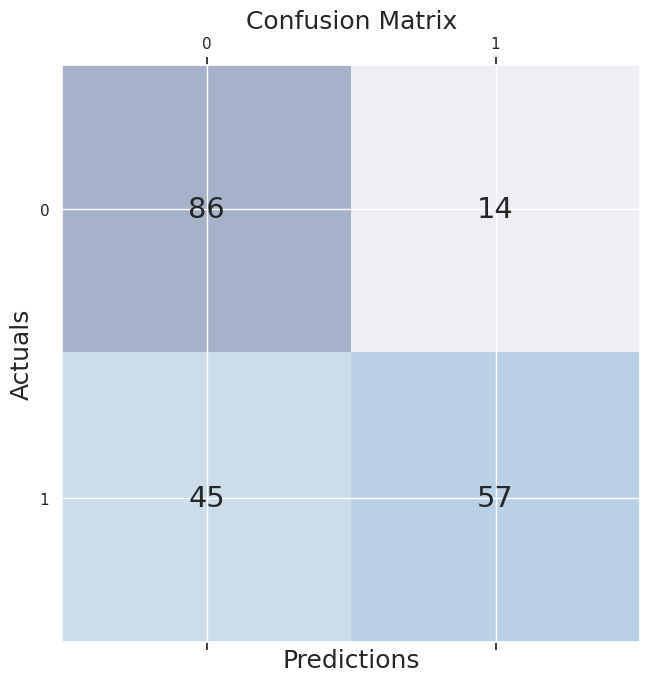

In [30]:
# 2 classes
correctly_assigned()

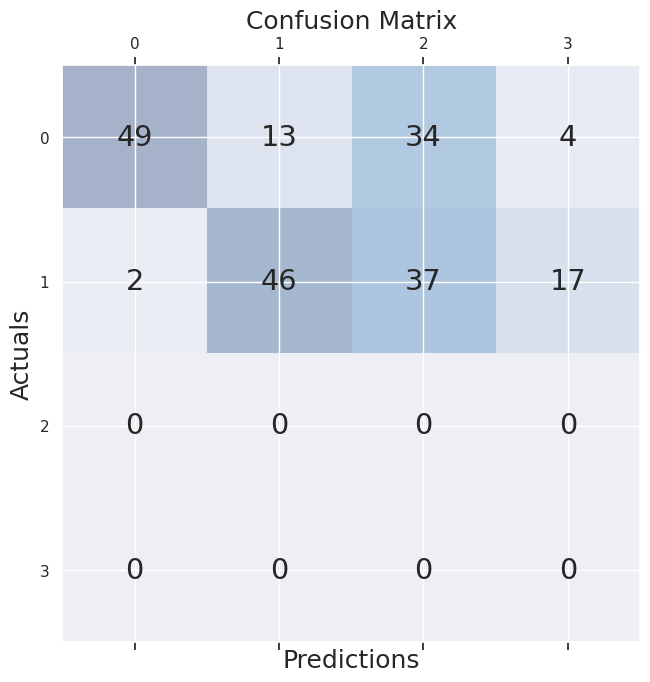

In [31]:
# 4 classes
correctly_assigned(dat = kmeans4)

4) Find optimal number of classes using the elbow method

In [32]:
# https://predictivehacks.com/k-means-elbow-method-code-for-python/

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

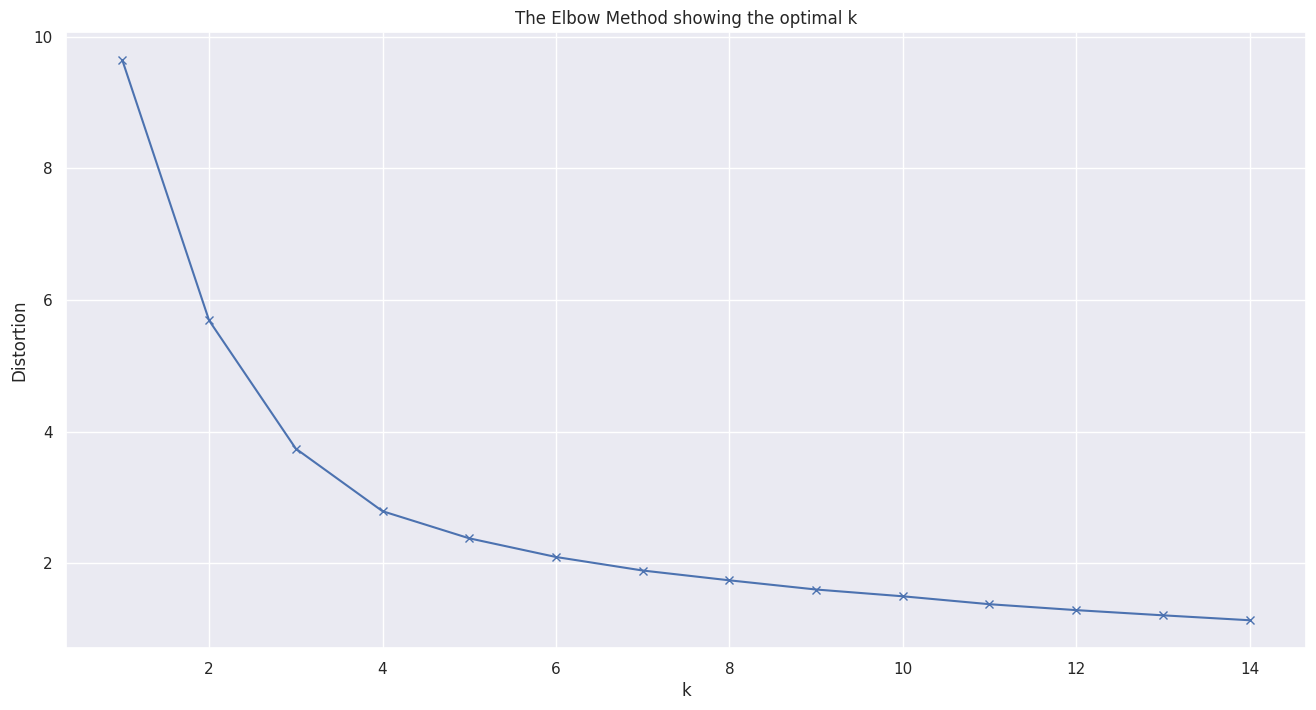

In [33]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

5) Compare the actual clusters and clusters created by kmeans

In [34]:
# function to plot actual vs kmeans clusters
def kmeans_vs_actual(dat1 = X, target = y, modl = kmeans, col_map = plt.cm.Set1):
    dat = pd.DataFrame(modl.predict(dat1))
    dat.rename({0: 'k_means'}, inplace = True, axis = 1)
    dat['target'] = target
    dat['wt'] = dat1.iloc[:,10]
    dat['pcBfat'] = dat1.iloc[:,7]

    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(dat['pcBfat'], dat['wt'], c=dat['target'])
    axes[1].scatter(dat['pcBfat'], dat['wt'], c=dat['k_means'], cmap = col_map)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

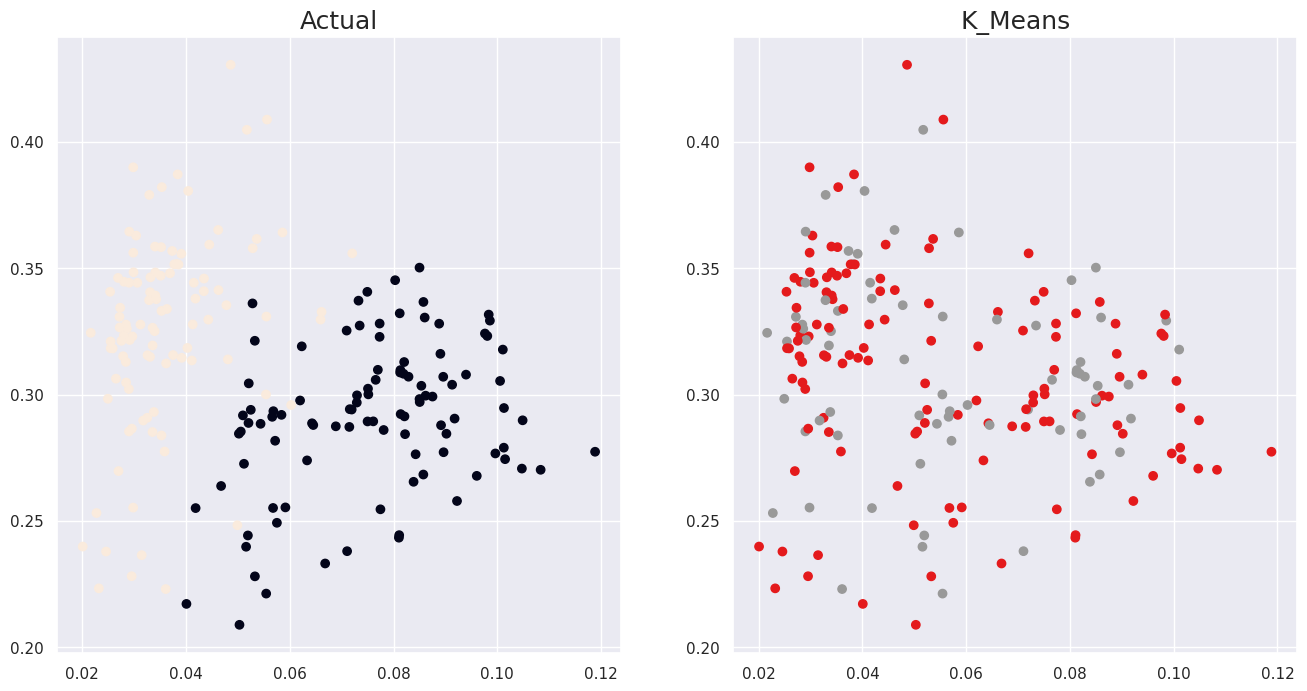

In [35]:
# for hue sex and 2 classes
kmeans_vs_actual()

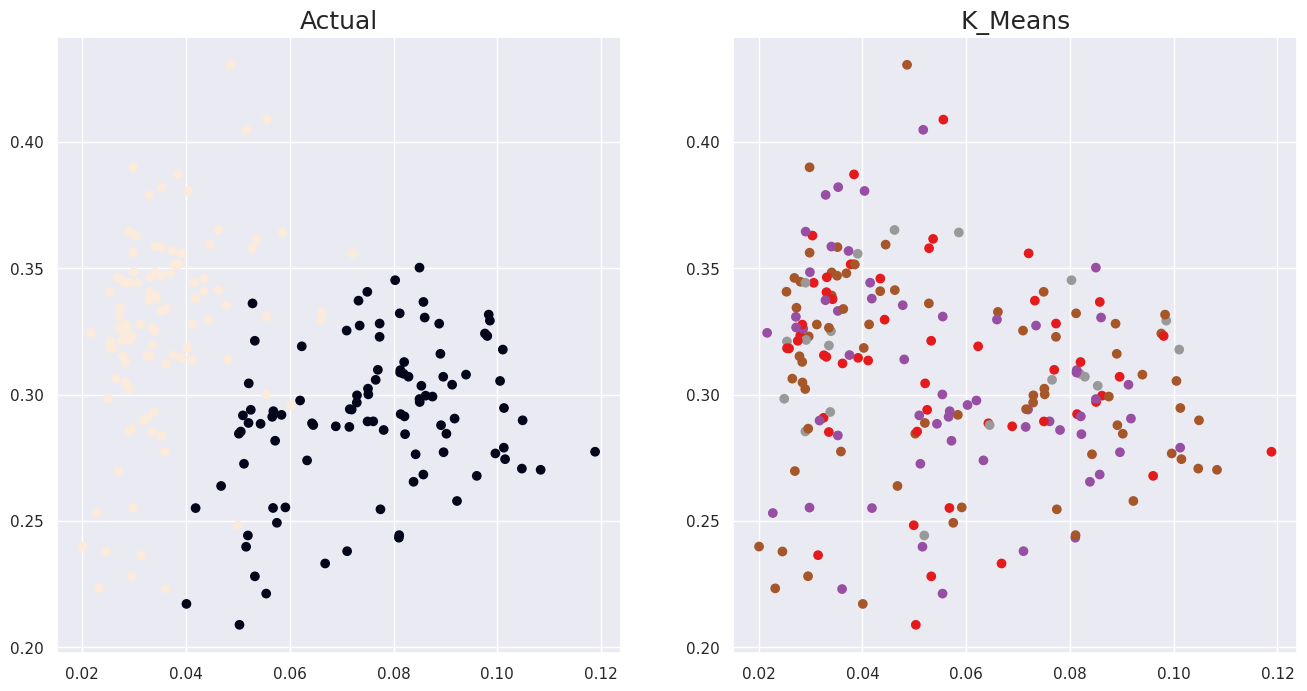

In [36]:
# for hue sex and 4 classes
kmeans_vs_actual(modl = kmeans4)